# Introduction to GeoPandas

This quick tutorial introduces the key concepts and basic features of GeoPandas.

## Concepts

GeoPandas, as the name suggests, extends the popular data science library [pandas](https://pandas.pydata.org) by adding support for geospatial data.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, that can store geometry columns and perform spatial operations. Therefore, your `GeoDataFrame` is a combination of traditional data (numerical, boolean, text etc.), and a column with geometries (points, polygons etc.).

![geodataframe schema](https://raw.githubusercontent.com/geopandas/geopandas/8279cc33bf46dcf23bbe8cf92179951e673bea68/doc/source/_static/dataframe.svg)

Each `GeoDataFrame` can contain any geometry type and has a `crs` attribute, which stores information about the projection (CRS stands for Coordinate Reference System).

`geopandas` also provides simple visualization capacity that you can make a quick map.

Now let's see how to use `geopandas` with some real data.


In [1]:
import geopandas as gpd #usually people use gpd as alias

## Reading files

`geopandas` can read in popular GIS data files including shapefiles, GeoJSON, GeoPackage, etc. You can read it using `geopandas.read_file()` function, which automatically detects the filetype and creates a GeoDataFrame.

So here I put some files in our course Github repository:

That you can fetch directly from an URL.

In [2]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/earthquake_2.5_month.geojson"

earthquakes = gpd.read_file(url)

A quick view of the table.

In [16]:
earthquakes.shape

(1543, 28)

.shape provides the dimensions of the dataframe

In [17]:
earthquakes.describe()

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,1543.000000,1.543000e+03,1.543000e+03,355.000000,355.000000,134.000000,1543.000000,1543.000000,1370.000000,1295.000000,1543.000000,1370.000000
mean,3.747577,1.693172e+12,1.693770e+12,82.380282,3.290141,3.255269,0.003889,234.891769,42.935036,2.351686,0.540175,125.679723
std,0.920816,7.315831e+08,5.959881e+08,770.665912,1.373966,1.617296,0.062257,134.320756,38.487086,3.801690,0.290454,73.969452
min,2.450000,1.691973e+12,1.691991e+12,0.000000,0.000000,0.000000,0.000000,92.000000,3.000000,0.000000,0.020000,12.000000
25%,2.800000,1.692562e+12,1.693378e+12,1.000000,2.200000,2.280250,0.000000,121.000000,19.000000,0.373500,0.310000,67.000000
50%,3.900000,1.693101e+12,1.693868e+12,3.000000,3.100000,3.361500,0.000000,246.000000,30.000000,1.208000,0.550000,107.000000
75%,4.500000,1.693796e+12,1.694259e+12,12.000000,4.100000,4.096000,0.000000,312.000000,53.000000,3.049500,0.720000,179.000000
max,7.100000,1.694563e+12,1.694564e+12,14117.000000,9.100000,8.606000,1.000000,2710.000000,417.000000,35.667000,2.440000,347.000000


In [3]:
earthquakes.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us7000kve8,4.2,"220 km WSW of Olonkinbyen, Svalbard and Jan Mayen",1694562818373,1694563821040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",17.0,2.483,0.91,88.0,mb,earthquake,"M 4.2 - 220 km WSW of Olonkinbyen, Svalbard an...",POINT Z (-14.5573 70.4794 10)
1,us7000kve6,5.0,"Andreanof Islands, Aleutian Islands, Alaska",1694560657599,1694564259770,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,3.1,...,",us,ak,",",dyfi,oaf,origin,phase-data,shakemap,",94.0,0.400,0.82,144.0,mb,earthquake,"M 5.0 - Andreanof Islands, Aleutian Islands, A...",POINT Z (-176.4521 51.5095 49.956)
2,us7000kvdp,2.8,"5 km W of Lemitar, New Mexico",1694556066488,1694564099941,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4.0,3.8,...,",us,",",dyfi,origin,phase-data,",38.0,0.013,0.72,59.0,ml,earthquake,"M 2.8 - 5 km W of Lemitar, New Mexico",POINT Z (-106.9664 34.1545 5.598)
3,us7000kvdm,4.9,"Unimak Island region, Alaska",1694555338349,1694562912694,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ak,us,",",origin,phase-data,shakemap,",72.0,0.589,0.71,153.0,mb,earthquake,"M 4.9 - Unimak Island region, Alaska",POINT Z (-164.1428 54.0132 54.242)
4,us7000kvc8,4.1,"48 km WNW of San Antonio de los Cobres, Argentina",1694543938160,1694556593040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",17.0,2.761,1.35,70.0,mb,earthquake,M 4.1 - 48 km WNW of San Antonio de los Cobres...,POINT Z (-66.78 -24.1161 186.525)


A quick map view of the data can be done by using the `.plot()` function to your `GeoDataFrame`.

<Axes: >

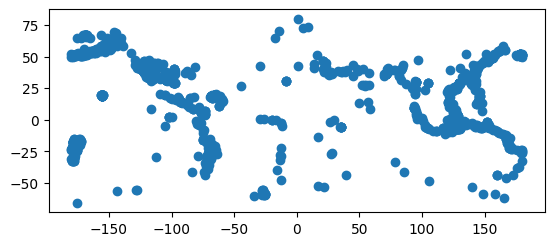

In [4]:
earthquakes.plot()

For the second data you can download a world country shapefile from [here](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore?location=-0.755783%2C0.000000%2C2.03). Click Download - > GEOJSON or Shaplefile format. You can then copy and paste to the same directory as this notebook. 

Here, for demostration purpose, I have uploaded a copy to the course github site. And you can directly read in the data from there.


In [7]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/fall-24/data/countries.geojson"

# local_geojson_path = "World_Countries_(Generalized)_9029012925078512962.geojson"

# local_shp_folder_path = "World_Countries_(Generalized)_2402777631520798174"

In [18]:
countries = gpd.read_file(url)

<Axes: >

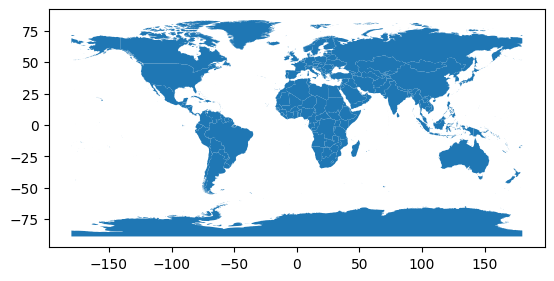

In [19]:
countries.plot()

## Coordinate Reference Systems

Spatial data should always have Coordinate Reference Systems (CRS) information. The CRS tells GeoPandas where the coordinates of the geometries are located on the earth’s surface. 
- In some cases, the CRS is geographic, which means that the coordinates are in latitude and longitude. In those cases, its CRS is WGS84, with the authority code `EPSG:4326` (2D) or `EPSG:4979` (3D). 
- In other cases, the CRS is projected, which means that the coordinates are in linear unit such as in meters. A popular CRS is what Google Maps and other online maps use which is `EPSG:3857`. Or the CRS that is mostly often used for making US maps such as `ESRI:102039` for which you will see a curved north border.
- When you have multiple datasets, and it is important to make sure they are in the same CRS (aligning) before making analysis or maps.
- [epsg.io](https://epsg.io) is a comprehensive database for looking up specific CRS and its code.






In [20]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
earthquakes.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The two datasets are both in WGS84 with lat and long, but they are with different EPSG codes.

You can transform CRS from one to another using `.to_crs()` function. The function can take EPSG code as a string.

In [22]:
countries = countries.to_crs("EPSG:3857")

In [23]:
countries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

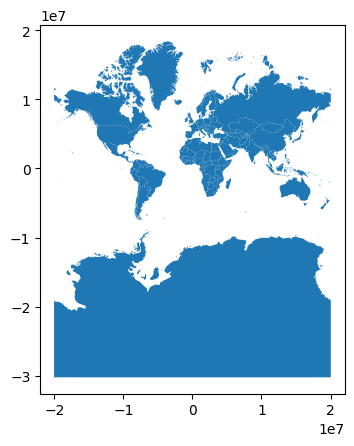

In [24]:
countries.plot()

You can also convert one's CRS by using the other's CRS, for example:


In [25]:
earthquakes = earthquakes.to_crs(countries.crs)

In [26]:
earthquakes.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

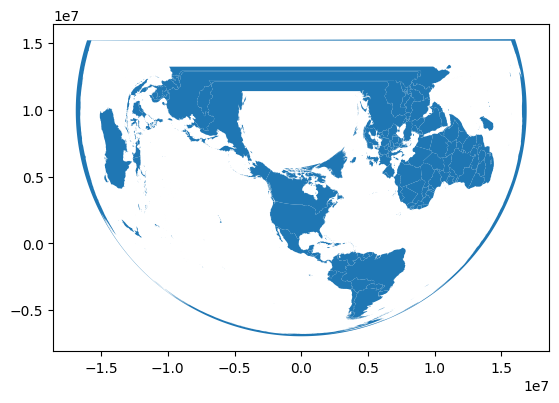

In [33]:
countries = countries.to_crs("ESRI:102039")
earthquakes = earthquakes.to_crs(countries.crs)

countries.plot()

In [35]:
countries = countries.to_crs("EPSG:3857")
earthquakes = earthquakes.to_crs(countries.crs)

## Simple attributes and functions

Now we have our `GeoDataFrame` and can start working with its geometry.

### Measuring area

To measure the area of each polygon, access the `GeoDataFrame.area` attribute, which returns a column. Note: in most of the cases, you want your data to be in a projected CRS before calculating area or distance.


In [36]:
countries.area # the unit here is square meters

0      9.346494e+11
1      5.058670e+10
2      3.014489e+12
3      1.754581e+08
4      9.349956e+08
           ...     
246    3.577962e+11
247    1.711690e+08
248    4.935727e+11
249    8.010726e+11
250    4.387838e+11
Length: 251, dtype: float64

You can also create a new column in the `GeoDataFrame` called `area_km2` to store the calculated area in km2 unit.

In [37]:
countries["area_km2"] = countries.area/1000/1000 # do a simple math to change to square km2
countries

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 5113950.867, 2179852.165...",5.058670e+04
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.03 4423494.247, 516027.527 44...",3.014489e+06
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1617338.54, -19007738...",1.754581e+02
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 5251578.747, 165479.439 5...",9.349956e+02
...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((11919975.671 1933404.703, 1192...",3.577962e+05
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-19821639.593 -1611402.115, -1...",1.711690e+02
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((5260340.777 1530115.438, 52508...",4.935727e+05
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((3363297.789 -1687093.287, 3363981.86...",8.010726e+05


Let's find out which country has the largest/smallest area? Have a guess before running the command?

Here we can call the `.sort_values()` function and it takes two important parameters:
- the column that we are using to sort. Here we use `area_km2`.
- whether it is sorted ascendingly (let `ascending=True`) or descendingly (let `ascending=False`).

In [38]:
countries.sort_values('area_km2', ascending=False)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2
7,8,Antarctica,AQ,None,None,1564.144143,5672.928286,"MULTIPOLYGON (((-20037507.067 -19140932.929, -...",6.966117e+08
184,185,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-20037507.067 10744606.424, -2...",8.304711e+07
41,42,Canada,CA,Canada,CA,2210.684826,1694.025240,"MULTIPOLYGON (((-9688723.272 9735729.723, -969...",5.119443e+07
90,91,Greenland,GL,Denmark,DK,942.221329,660.927165,"MULTIPOLYGON (((-5665945.564 10647676.549, -56...",3.522470e+07
238,239,United States,US,United States,US,726.106056,1116.670604,"MULTIPOLYGON (((-8504253.492 4754669.58, -8503...",2.172895e+07
...,...,...,...,...,...,...,...,...,...
87,88,Gibraltar,GI,United Kingdom,GB,0.144833,0.000786,"POLYGON ((-593834.805 4323013.059, -594165.765...",1.205802e+01
226,227,Tokelau,TK,New Zealand,NZ,0.108696,0.000606,"POLYGON ((-19130037.994 -1030699.152, -1913124...",7.610015e+00
116,117,Juan De Nova Island,TF,France,FR,0.092503,0.000487,"POLYGON ((4759123.754 -1929687.405, 4757965.03...",6.313204e+00
88,89,Glorioso Islands,TF,France,FR,0.079231,0.000407,"POLYGON ((5264947.395 -1297694.436, 5263417.31...",5.152374e+00


Does the ranking make any sense, if not, why?

**Mercator projection is skewed, which causes certain countries (greenland, antarctica) to have skewed / distorted area**  
***should use an equal-area projection for actual area***

### Getting polygon boundary and centroid

To get the boundary of each polygon (LineString), access the `GeoDataFrame.boundary`:

<Axes: >

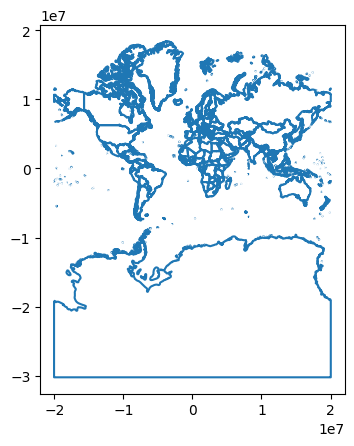

In [39]:
countries.boundary.plot()

Similarly we can get centroids of countries from the country polygons.

<Axes: >

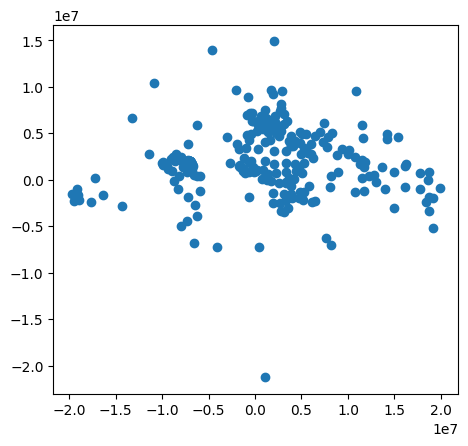

In [40]:
countries.centroid.plot()

Or to create a circle buffer of each location using `.buffer` and specify a distance.

We can do this for the earthquake data and create a 500,000m buffer zone to show the affected area. 

<Axes: >

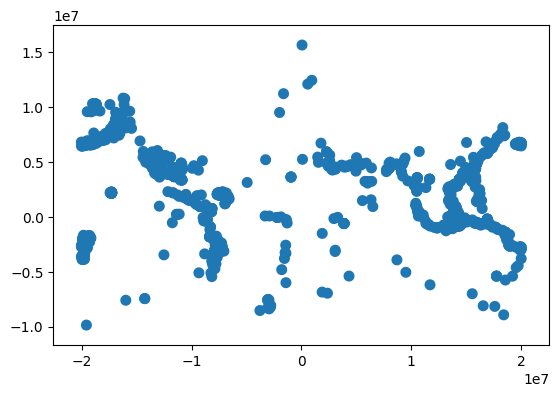

In [41]:
earthquakes.buffer(500000).plot()

## Making maps

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call `GeoDataFrame.plot()`. To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the `"area_km2"` column. We also want to show a legend (`legend=True`).

<Axes: >

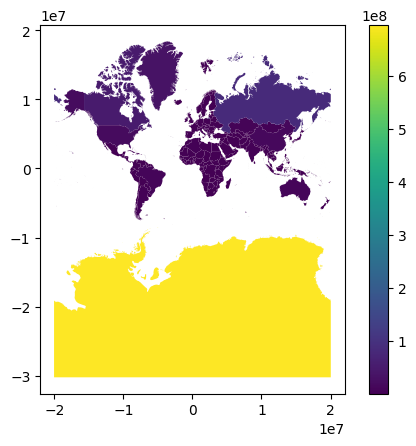

In [42]:
countries.plot("area_km2", legend=True)

In [43]:
earthquakes.columns

Index(['id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'geometry'],
      dtype='object')

Or to make color to represent the magnitude of each earthquake.

<Axes: >

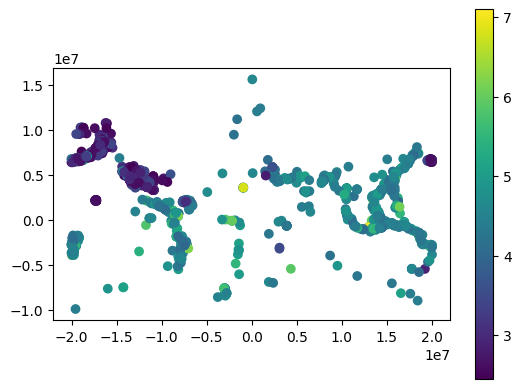

In [50]:
earthquakes.plot(column='mag',legend=True)

You can change the color scale by specifying `cmap='Oranges'`

Other supported color scales can be found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

can add _r to the string to reverse the color scale (cmap="Oranges_r")

<Axes: >

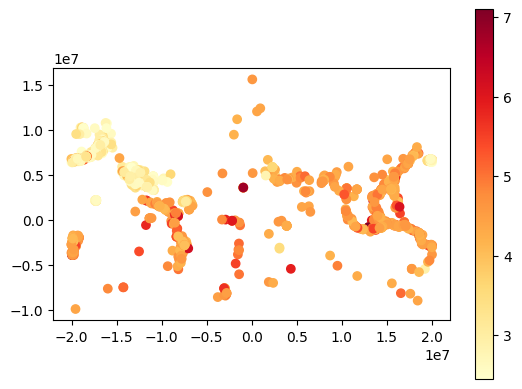

In [52]:
earthquakes.plot(column='mag',legend=True,cmap="YlOrRd")

More often we need to overlay multiple layers on top of each other. Here we need to put them on the same `axis`.

First, create the first layer and named it as `ax`. Then plot the second layer, and within the `plot()` function, write down `ax=ax`.

You can also set some level of transparency by including `alpha=0.2` in the plot function, and to change the default blue color into red color `color='red'`.

For listed colors you can refer to this [webpage](https://matplotlib.org/stable/gallery/color/named_colors.html)

Alternatively, you can use hex code colors such as `color = '#FF0000'`.

In [53]:
earthquake_buffer = earthquakes.centroid.buffer(500000)

<Axes: >

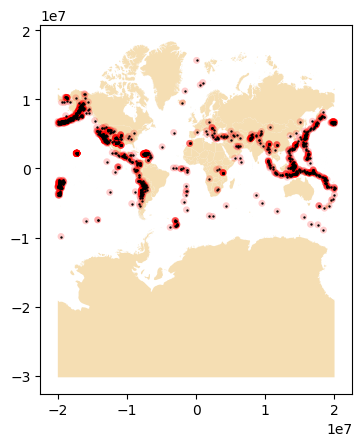

In [60]:
ax = countries.plot(color='wheat')

earthquake_buffer.plot(ax=ax,color='red',alpha=0.2)
earthquakes.plot(ax=ax, color="black", markersize=0.5)

<Axes: >

## Geometric relationships
The most commonly used geometric operation is spatial join:

- `GeoDataFrame.sjoin`

A spatial join can merge two `GeoDataFrame`s, one left, one right based on a `predicate`. The predicate can be, for example, `within`,`intersects`, `contains`, etc., for different operations.

![spatial join schema](https://datavisdotblog.files.wordpress.com/2022/01/spatial-joins-header.png?w=1204)



The results of the spatial join will be a new `GeoDataFrame` with all information from both the `GeoDataFrame` tables that meet the speficied `predicate` condition.

Here, if the interest is to count how many earthquakes fall within each country, then we will be joining the country GeoDataFrame with the earthquakes GeoDataFrame with `predicate="contains"`. For point-polygon overlay, you can also use `intersects`. And you may use other predictaes for other tasks.

In fact, counting points in polygon is a complicated task but it can be broken down into several steps:

### Step 1

In [61]:
joined = gpd.sjoin(countries, earthquakes, predicate="contains")

joined

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2,index_right,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,534,...,",us7000ksg5,",",us,",",dyfi,origin,phase-data,",94.0,0.481,0.72,62.0,mb,earthquake,"M 4.6 - Hindu Kush region, Afghanistan"
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,307,...,",us7000ktdu,",",us,",",origin,phase-data,",35.0,1.641,0.61,85.0,mb,earthquake,"M 4.3 - 50 km E of Nahrīn, Afghanistan"
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,1251,...,",us7000kper,",",us,",",dyfi,origin,phase-data,",64.0,2.277,0.94,77.0,mb,earthquake,"M 4.6 - 65 km S of Jurm, Afghanistan"
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,389,...,",us7000kt3g,",",us,",",origin,phase-data,",20.0,2.423,0.48,73.0,mb,earthquake,"M 4.4 - Hindu Kush region, Afghanistan"
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,441,...,",us7000ksxa,",",us,",",origin,phase-data,",40.0,2.525,0.45,75.0,mb,earthquake,"M 4.0 - 48 km WSW of Ashkāsham, Afghanistan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,United States,US,United States,US,726.106056,1116.670604,"MULTIPOLYGON (((-8504253.492 4754669.58, -8503...",2.172895e+07,1348,...,",ak023aiyelgl,us7000kp0d,",",ak,us,",",origin,phase-data,",22.0,0.016,0.27,97.0,ml,earthquake,"M 2.7 - 263 km W of Adak, Alaska"
242,243,Uzbekistan,UZ,Uzbekistan,UZ,60.322069,48.369999,"POLYGON ((7641267.328 4845362.868, 7640659.172...",8.045177e+05,66,...,",us7000kuxu,",",us,",",origin,phase-data,",31.0,0.706,0.71,64.0,mb,earthquake,M 4.1 - eastern Uzbekistan
242,243,Uzbekistan,UZ,Uzbekistan,UZ,60.322069,48.369999,"POLYGON ((7641267.328 4845362.868, 7640659.172...",8.045177e+05,787,...,",us7000kr8h,",",us,",",dyfi,origin,phase-data,",28.0,0.510,0.31,54.0,mb,earthquake,M 4.4 - Uzbekistan-Kyrgyzstan border region
243,244,Vanuatu,VU,Vanuatu,VU,16.411468,1.037135,"MULTIPOLYGON (((18602357.244 -1703460.257, 186...",1.339262e+04,1118,...,",us7000krhq,",",us,",",origin,phase-data,",38.0,6.149,0.61,124.0,mb,earthquake,"M 4.8 - 49 km WNW of Port-Olry, Vanuatu"


The above returns every single possible pair of country-earthquake if any earthquake falls within any country. This means that:
- A country with multiple earthquakes will appear as multiple rows
- An earthquake that is not contained by any country are dropped.
- This behaviour is called an `inner` join, which is the default of `.sjoin()`. You can also use `how=left` or `how=right`, if you want to retain all the left or right records even the predicate fails. See [here](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html) for more details.

### Step 2

Grouping rows by polygon ID (here I use `COUNTRY`) and count how many rows each country has (with `.size()`). The result will be a single column pandas.Series with COUNTRY name as the index. 

In [67]:
counts = joined.groupby("COUNTRY").size()
counts

COUNTRY
Afghanistan            13
Albania                 1
Angola                  1
Argentina              17
Azerbaijan              2
Bangladesh              1
Bolivia                 4
Bulgaria                1
Canada                  3
Chile                  23
China                  24
Colombia               12
Congo DRC               1
Costa Rica              3
Ecuador                 6
Guatemala               1
Hungary                 4
Iceland                 1
India                   2
Indonesia              14
Iran                    5
Iraq                    1
Japan                   7
Mexico                 16
Mongolia                1
Morocco                 4
Myanmar                 3
New Zealand             2
Papua New Guinea       12
Peru                    8
Philippines             4
Poland                  1
Puerto Rico            48
Romania                 1
Russian Federation      6
Solomon Islands         1
South Africa            2
Spain                   1
Taji

Next we need to join the result with our original dataframe. To do so, first we reset the index of the above Series so that it will be a DataFrame with COUNTRY as a seperate column

In [68]:
counts = counts.reset_index()

counts

,COUNTRY,0
0,Afghanistan,13
1,Albania,1
2,Angola,1
3,Argentina,17
4,Azerbaijan,2
5,Bangladesh,1
6,Bolivia,4
7,Bulgaria,1
8,Canada,3
9,Chile,23


You can then merge this result back to your countries GeoDataFrame

In [69]:
countries_merged = countries.merge(counts,on="COUNTRY",how="left")

countries_merged.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2,0
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,13.0
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 5113950.867, 2179852.165...",5.058670e+04,1.0
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.03 4423494.247, 516027.527 44...",3.014489e+06,NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1617338.54, -19007738...",1.754581e+02,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 5251578.747, 165479.439 5...",9.349956e+02,NaN


In [70]:
#rename the '0' as a real column name
countries_merged = countries_merged.rename(columns={0:'n_points'})

countries_merged.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area_km2,n_points
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 4246712.61, 6823482.06 42...",9.346494e+05,13.0
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 5113950.867, 2179852.165...",5.058670e+04,1.0
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.03 4423494.247, 516027.527 44...",3.014489e+06,NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1617338.54, -19007738...",1.754581e+02,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 5251578.747, 165479.439 5...",9.349956e+02,NaN


Then you can make a map showing the distribution of earthquake counts. The numbers are very skewed so the map doesn't look nice apart from showing US has the most earthquakes.

Also you may notice that some countries are dropped because they don't have any earthquakes.

<Axes: >

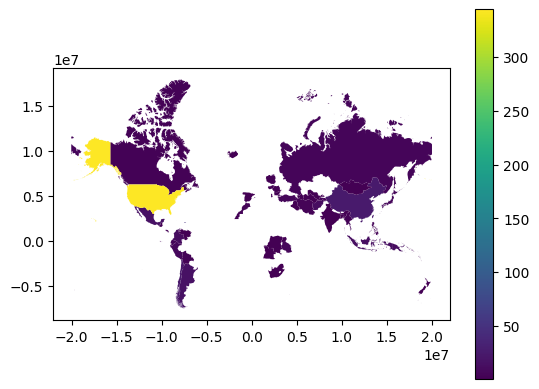

In [71]:
countries_merged.plot(column='n_points',legend=True)

There are two methods to fix this:
- to specify a style for the missing countries by passing a dictionary of style parameters into the `missing_kwds` parameter in `.plot()`
- or to replace NAN with 0 so that you can use normal `.plot()`

<Axes: >

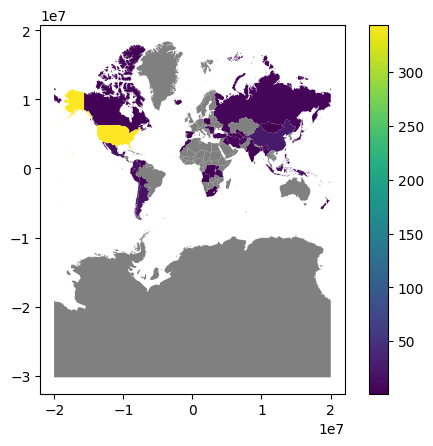

In [72]:
countries_merged.plot(column='n_points',legend=True, 
                      missing_kwds={"color":"grey"})

<Axes: >

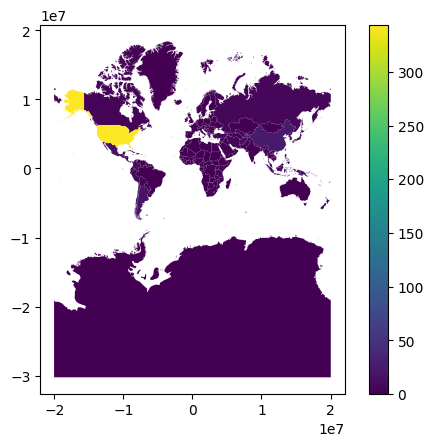

In [73]:
countries_merged["n_points"] = countries_merged["n_points"].fillna(0)

countries_merged.plot(column='n_points',legend=True)

Other spatial join such as involving lines will follow pretty much the same logic. Essentially, you will need to first perform joining, then grouping by and using some aggregation functions.

### Creating Geopandas from coodinates

Sometimes, most often if you have point location data, they are not in a spatial format, but rather in a normal table such as in csv. If you want to make it into a GeoDataFrame you can then following the below.

In [74]:
import pandas as pd

nyc_wifi_url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/fall-24/data/nyc-wi-fi-hotspot-locations.csv"

nyc_wifi = pd.read_csv(nyc_wifi_url)

In [75]:
nyc_wifi.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,8641,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-25 41 AVENUE,40.755727,-73.944583,999603.226171,214613.274563,...,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4746,"{'longitude': '-73.944583', 'human_address': '..."
1,8642,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-43 41 AVENUE,40.755333,-73.944131,999728.543834,214469.807003,...,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4747,"{'longitude': '-73.944131', 'human_address': '..."
2,8643,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,...,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4748,"{'longitude': '-73.945166', 'human_address': '..."
3,8644,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,...,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4749,"{'longitude': '-73.945166', 'human_address': '..."
4,8645,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701232,214621.916935,...,Queensbridge-Ravenswood-Long Island City,26.0,11101,401.0,25.0,4002500.0,4433386.0,4.004700e+09,4750,"{'longitude': '-73.945166', 'human_address': '..."


We will use the Latitude and Longitude columns as the geometry of our GeoDataFrame. And if it is in lat-long, the CRS will be 4326.

In [76]:
geometry = gpd.points_from_xy(nyc_wifi.Longitude, nyc_wifi.Latitude)

nyc_wifi_gdf = gpd.GeoDataFrame(nyc_wifi, geometry=geometry, crs="EPSG:4326")

<Axes: >

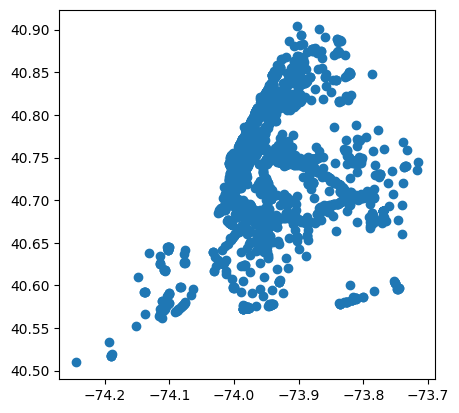

In [77]:
nyc_wifi_gdf.plot()